In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('~/Downloads/cell_types_specimen_details.csv', sep=",", header=0)
df = df[['ef__adaptation', 'donor__species']]
df = df.dropna()

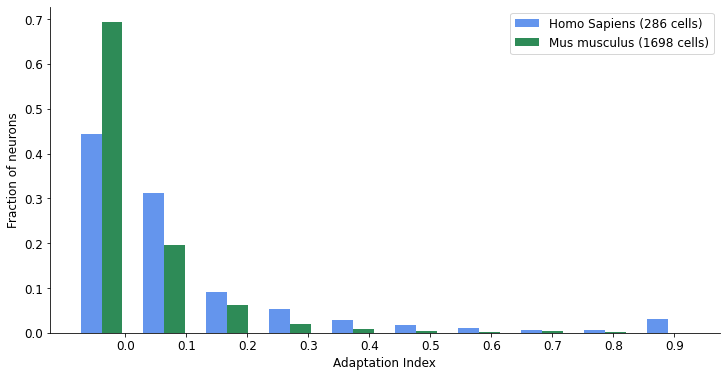

In [3]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12,6))

a = df[df.donor__species=='Homo Sapiens']['ef__adaptation']
b = df[df.donor__species=='Mus musculus']['ef__adaptation']
a_heights, a_bins = np.histogram(a, weights=np.ones_like(a) / len(a))
b_heights, b_bins = np.histogram(b, bins=a_bins, weights=np.ones_like(b) / len(b))

width = (a_bins[1] - a_bins[0])/3
offset = 0

ax.bar(offset+a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue',
       label=f'Homo Sapiens ({a.shape[0]} cells)')
ax.bar(offset+b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen',
       label=f'Mus musculus ({b.shape[0]} cells)')
ax.set_xticks(np.arange(0, 1, 0.1))
ax.legend()
ax.set_xlabel('Adaptation Index')
ax.set_ylabel('Fraction of neurons')
seaborn.despine(ax=ax, offset=0)